# Case Study on Microns embeddings

In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ["XLA_PYTHON_CLIENT_ALLOCATOR"] = "platform"
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false"

In [2]:
import pickle
import pandas as pd
import numpy as np
import corc.graph_metrics.neb
import corc.utils
import corc
import corc.tmm_plots


In [3]:
!!pwd

['/user/ritzert/git/cluster_vs_continuum/notebooks/paper_figures']

In [4]:
file_path = "../../datasets/graphdino_morphological_embeddings_tsne.pkl"
microns_dataset = pd.read_pickle(file_path)
microns_latent_emb = np.array([np.array(sublist) for sublist in microns_dataset["latent_emb"]])
microns_tsne = np.array([np.array(sublist) for sublist in microns_dataset["tsne"]])
y = microns_dataset["assigned_layer_num"]
X = microns_latent_emb

In [5]:
microns_dataset

,segment_id,split_index,assigned_layer,soma_x,soma_y,soma_z,latent_emb,assigned_layer_num,tsne
0,864691135809506508,0,L6,786.853079,-966.978788,978.984702,"[0.6002674102783203, 0.23157505691051483, -0.3...",3,"[0.15176153, -18.207289]"
1,864691136906798958,0,L4,918.602958,-720.669160,689.470267,"[0.24170437455177307, 1.1170365810394287, -0.8...",1,"[-16.277462, -1.5155475]"
2,864691135946684769,0,L5,764.721793,-793.125344,780.922957,"[1.300627589225769, 0.5208006501197815, -0.649...",2,"[-22.36429, -6.991958]"
3,864691135478263750,0,L6,915.639978,-943.565034,726.730846,"[0.10620708763599396, -0.22771331667900085, 0....",3,"[8.303619, -9.426491]"
4,864691135432723442,0,L5,631.949298,-799.105147,679.803098,"[0.9407323598861694, 0.01438860036432743, -0.3...",2,"[-41.52886, -7.247839]"
...,...,...,...,...,...,...,...,...,...
32566,864691135571383333,0,L6,691.893496,-946.797094,819.875343,"[0.6128422021865845, 0.7449007034301758, -1.04...",3,"[-4.020319, -30.857578]"
32567,864691136209015228,0,L4,920.774836,-716.813855,911.972832,"[0.05817554146051407, 0.6447629928588867, -0.5...",1,"[-14.519997, 5.226278]"
32568,864691135575345438,0,L23,659.007840,-520.323678,840.140937,"[0.957221508026123, -0.8427739143371582, 0.414...",0,"[30.390465, 6.1123953]"
32569,864691135463815237,0,L4,676.474315,-739.339271,826.102541,"[0.8656796216964722, 0.06604354828596115, -0.6...",1,"[-21.660915, 24.494837]"


In [6]:
tmm_model = corc.graph_metrics.neb.NEB(
    data=X,
    labels=y,
    n_components=30,
    optimization_iterations=100,
)
tmm_model.fit(X)

2024-12-20 15:19:53.894348: W external/xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.2 which is older than the PTX compiler version 12.6.77. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


[[  998  4554]
 [ 1150  3225]
 [ 1102  6208]
 [ 1687  4191]
 [ 1052  5620]
 [ 1233  5708]
 [ 1088  7524]
 [ 1176  3763]
 [  911  4976]
 [ 1235  3865]
 [  682  5278]
 [ 1334  3643]
 [ 1102  6168]
 [ 1385  5247]
 [ 1291  4018]
 [ 1232  3013]
 [  506  7715]
 [ 1112  2912]
 [ 1170  4515]
 [ 1048  5859]
 [  680  7157]
 [  912  6281]
 [ 1183  3411]
 [  558  9302]
 [  607 10499]
 [ 1346  2979]
 [ 1057  3405]
 [ 1185  4103]
 [ 1092  3674]
 [ 1457  4701]]
After filtering 30 components, we are left with 30 components
[[  998  4554]
 [ 1150  3225]
 [ 1102  6208]
 [ 1687  4191]
 [ 1052  5620]
 [ 1233  5708]
 [ 1088  7524]
 [ 1176  3763]
 [  911  4976]
 [ 1235  3865]
 [  682  5278]
 [ 1334  3643]
 [ 1102  6168]
 [ 1385  5247]
 [ 1291  4018]
 [ 1232  3013]
 [  506  7715]
 [ 1112  2912]
 [ 1170  4515]
 [ 1048  5859]
 [  680  7157]
 [  912  6281]
 [ 1183  3411]
 [  558  9302]
 [  607 10499]
 [ 1346  2979]
 [ 1057  3405]
 [ 1185  4103]
 [ 1092  3674]
 [ 1457  4701]]


tmm: 100%|██████████| 435/435 [09:57<00:00,  1.37s/it]


In [8]:
num_clusters = tmm_model.n_components
file_path = "../../cache/microns_tmm_{num_clusters}.pickle"
with open(file_path, 'wb') as file:
    pickle.dump(tmm_model, file)

In [17]:
file_path_20 = "../../cache/microns_tmm.pickle"
with open(file_path_20, 'rb') as file:
    tmm_model_20 = pickle.load(file)

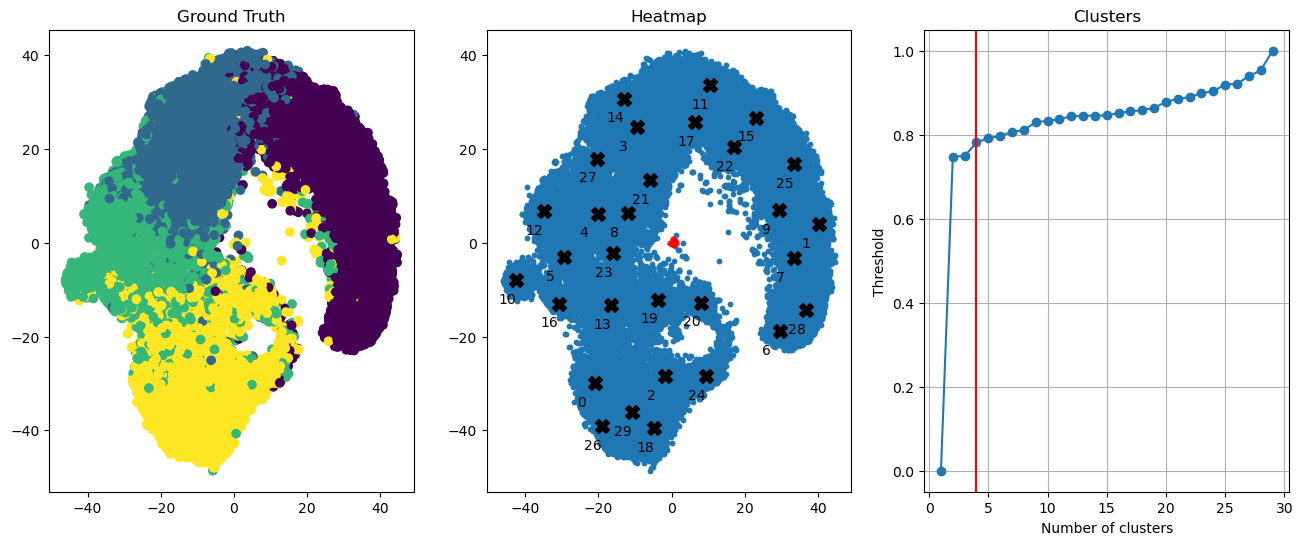

In [7]:
corc.tmm_plots.plot_row(X,y,tmm_model, transformed_points=microns_tsne)

In [8]:
corc.tmm_plots.plot_cluster_levels([2,3,4,6,8,10,12,18], tmm_model_20, X, transformed_points=microns_tsne)

NameError: name 'tmm_model_20' is not defined